# Pandas

##Задания

**Задание 1.**

Задан Series объект s, найти индекс первого элемента отсортированного s, где значения больше 5.

In [2]:
# задано изначально
import numpy as np
import pandas as pd

r = np.random.RandomState(1)
s = pd.Series(r.uniform(0, 10, 100))

s = s.sort_values(ascending=True)
a = s[s>5].index[0]
print(f'индекс первого элемента отсортированного s, где значения больше 5 = {a}')


индекс первого элемента отсортированного s, где значения больше 5 = 67


**Задание 2.**

Имеется небольшой игрушечный DataFrame, в котором необходимо провести несколько типов фильтраций и отобразить результат:

* всех, кто старше 40
* всех, кто имеет доход выше среднего по датасету
* всех, кто имеет доход выше среднего по датасету, но надежность ниже среднего по датасету

создать новые столбцы:

* важность клиента = доход * надежность
* возможная долгосрочность клиента = важность клиента * (средний возраст по датасету - возраст клиента)

`подсказка: двойные условия записываются так: (условие 1) & (условие 2)`


** примечание: столбцы не имеют отношения к реальным формулам или моделям, они необходимы только для наглядности

In [ ]:
# создадим тестовый датасет
df = pd.DataFrame({
    'имя': ['Петя', 'Вася', 'Аня', 'Света'],
    'возраст': [45, 26, 41 , 21],
    'доход': [100000, 80000, 150000, 60000],
    'надежность клиента (0..1)': [0.65, 0.74, 0.87, 0.68],
    'пол': ['муж', 'муж', 'жен', 'жен']},
    index=[0, 1, 2, 3])
df

,имя,возраст,доход,надежность клиента (0..1),пол
0,Петя,45,100000,0.65,муж
1,Вася,26,80000,0.74,муж
2,Аня,41,150000,0.87,жен
3,Света,21,60000,0.68,жен


In [ ]:
print("Все, кто старше 40:")
df[df['возраст']>40]

Все, кто старше 40:


,имя,возраст,доход,надежность клиента (0..1),пол
0,Петя,45,100000,0.65,муж
2,Аня,41,150000,0.87,жен


In [ ]:
print("Все, у кого доход выше среднего:")
averageIncome = df['доход'].sum()/df['доход'].size
df[df['доход']>averageIncome]

Все, у кого доход выше среднего:


,имя,возраст,доход,надежность клиента (0..1),пол
0,Петя,45,100000,0.65,муж
2,Аня,41,150000,0.87,жен


In [ ]:
print("Все, у кого доход выше среднего и надежность ниже среднего:")
averageReliability = df['надежность клиента (0..1)'].sum()/df['надежность клиента (0..1)'].size
df[(df['доход']>averageIncome) & (df['доход']<averageReliability)]

Все, у кого доход выше среднего и надежность ниже среднего:


,имя,возраст,доход,надежность клиента (0..1),пол


In [ ]:
df.loc[:, 'важность клиента'] = df['доход']*df['надежность клиента (0..1)']
averageAge = df['возраст'].sum()/df['возраст'].size
df.loc[:, 'возможная долгосрочность клиента'] = df['важность клиента']*(averageAge - df['возраст'])
print("Добавим столбцы важность клиента и возможная долгосрочночть клиента:")
df

Добавим столбцы важность клиента и возможная долгосрочночть клиента:


,имя,возраст,доход,надежность клиента (0..1),пол,важность клиента,возможная долгосрочность клиента
0,Петя,45,100000,0.65,муж,65000.0,-763750.0
1,Вася,26,80000,0.74,муж,59200.0,429200.0
2,Аня,41,150000,0.87,жен,130500.0,-1011375.0
3,Света,21,60000,0.68,жен,40800.0,499800.0


**Задание 3.**

Как объединить два DataFrame по двум столбцам так, чтобы остались только общие строки?

Объедините df1 и df2 по столбцам fruit-frukt и weight-ves.

In [ ]:
df1 = pd.DataFrame({'fruit': ['apple', 'banana', 'orange'] * 3,
                    'weight': ['low', 'medium', 'high'] * 3,
                    'price': np.random.randint(0, 100, 9)})

df2 = pd.DataFrame({'frukt': ['apple', 'banana', 'melon'] * 2,
                    'ves': ['low', 'high'] * 3,
                    'price': np.random.randint(0, 100, 6)})

df2.rename(columns={"frukt": "fruit", 'ves':'weight',}, inplace = True)
df3 = df1.drop(['price'], axis=1).merge(df2.drop(['price'], axis=1))
df3

,fruit,weight
0,apple,low
1,apple,low
2,apple,low


**Задание 4.** 
Сгенерировать и добавить номера телефонов следующего вида +7(000)000 00 00 в таблицу



In [105]:
d = [{"Name": "Виктор", "Age": 18},
     {"Name": "Мария", "Age": 21},
     {"Name": "Иван", "Age": 19},
     {"Name": "Иван", "Age": 25},
     {"Name": "Алексей", "Age": 20}]
df = pd.DataFrame(d)

number = np.random.randint(0, 9, (5,10)).astype(dtype=str)
phone = pd.Series(["+7("]*5)
phone = phone + number[:,0] + number[:,1]+ number[:,2] +")"
phone = phone + number[:,3] + number[:,4]+ number[:,5] +" "
phone = phone + number[:,6] + number[:,7]+ " "
phone = phone + number[:,8] + number[:,9]

df.loc[:, 'Phone'] = phone
df

,Name,Age,Phone
0,Виктор,18,+7(004)541 37 64
1,Мария,21,+7(567)528 18 26
2,Иван,19,+7(356)118 12 26
3,Иван,25,+7(827)186 44 06
4,Алексей,20,+7(457)071 63 72


***Задание 1***

Скачать файл по ссылке https://disk.yandex.ru/d/ZeDbB3rqhIr1NA , считать через pandas. Получить список уникальных значений - стран в колонке "Country", отфильтровать и получить данные только по выпускникам колледжа. Убрать строки с пропусками в данных (NaN). (В случае ошибок типов можете конвертировать колонки к нужным типам через .astype(str) или .astype(int). Подсчитать макс значение, среднее и СКО для числа детей (household_children) в отфильтрованных данных.

In [55]:
import pandas as pd
import numpy as np

df = pd.read_csv("H1N1_Flu_Vaccines.csv", sep=',')
print(f"Уникальные страны: {df['hhs_geo_region'].nunique()}")

df = df[df['education']=='College Graduate']
df = df.dropna(axis=0, how='any')
print(f"Максимальное количество детей: {df['household_children'].max()}")
average = df['household_children'].sum()/df['household_children'].size
print(f"Среднее количество детей: {average:.3f}")
standardDeviation = (df['household_children'].values-average)**2
standardDeviation = np.sqrt(standardDeviation).sum()/df['household_children'].size
print(f"СКО: {standardDeviation:f}")

Уникальные страны: 10
Максимальное количество детей: 3.0
Среднее количество детей: 0.648
СКО: 0.827297


***Задание 2***

Скачать файл по ссылке https://disk.yandex.ru/i/uoN5eQE1qPCXCQ , считать через pandas второй лист (Olympics). Отфильтровать данные по России и золотым медалистам, построить график разброса возраст-вид_спорта. Построить линейный график на след данных - df.groupby('Year').Age.mean().dropna(). Сохранить графики в pdf. Отфильтровать изначальные данные только по летнему сезону, убрать колонку Город, создать колонку Год рождения, вычислить её через Возраст и Дату проведения, датафрейм сохранить вместе с графиками в архиве и скачать (командами, не через GUI).

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel("Olympics 2018.xlsx",sheet_name='Olympics')


In [107]:
df = df.dropna(axis=1, how='all')

In [108]:
df = df[(df['Country']=='Soviet Union')&(df['Medal']=='GOLD')]

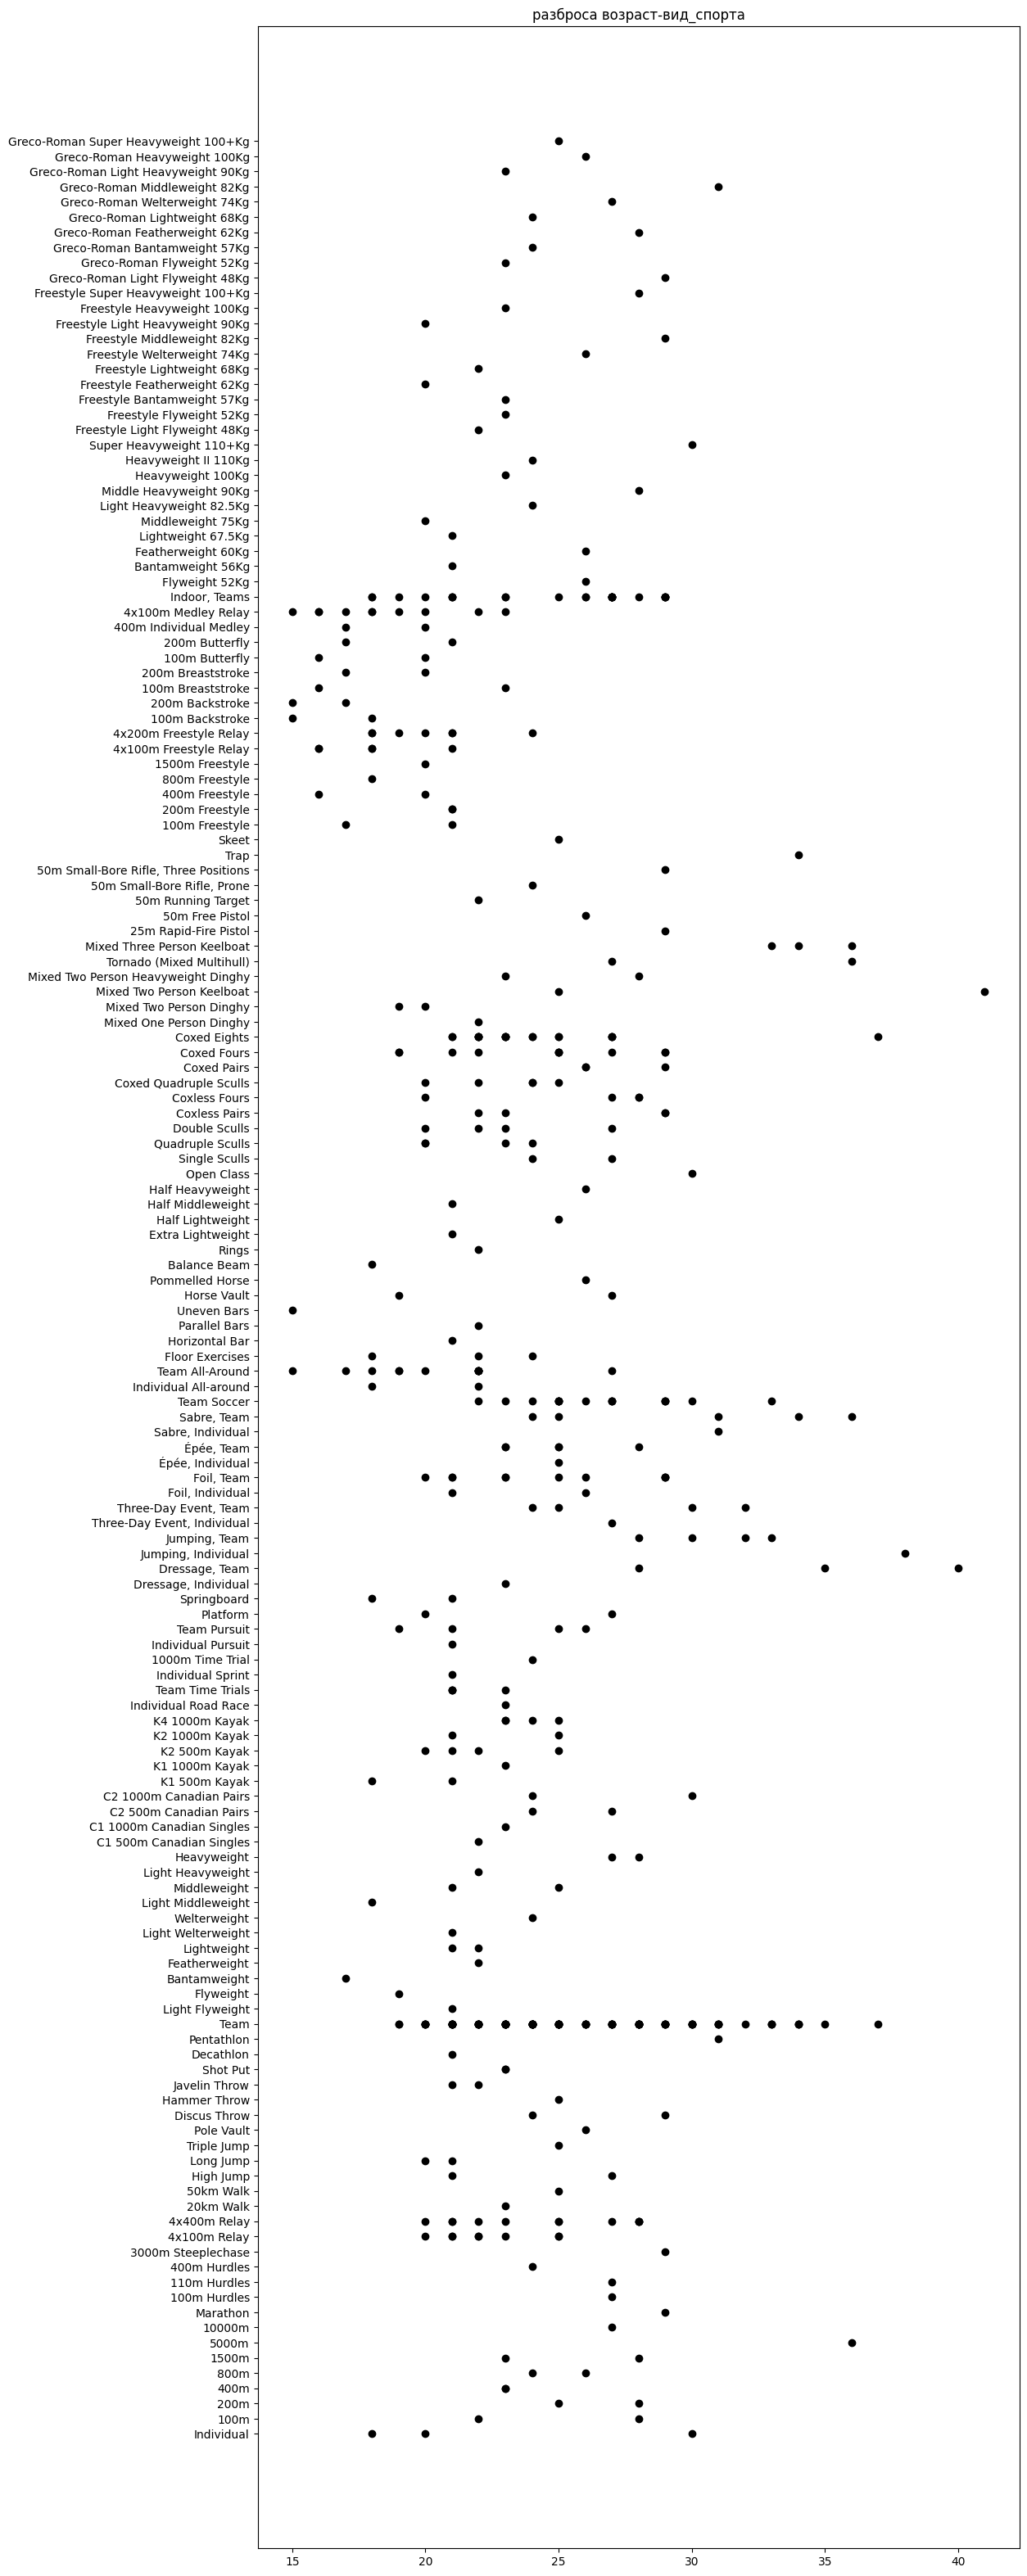

In [90]:
x = df['Age'].values
y = df['Event'].values
fig, ax = plt.subplots()
ax.scatter(x, y, c = 'black') 
ax.set_facecolor('white')   
fig.set_figwidth(12)
fig.set_figheight(40)
plt.title("разброса возраст-вид_спорта")
plt.show()

In [98]:
from matplotlib.backends.backend_pdf import PdfPages
pdf = PdfPages("Figure.pdf")
pdf.savefig(plt.figure())
pdf.close()

<Figure size 640x480 with 0 Axes>

In [116]:
df1 = df[df['Season']=='Summer']
df1 = df1.drop(['City'], axis=1)
df1 = df1.dropna(axis=1, how='all')
df1.loc[:, 'Birth Year'] = df['Year'] - df['Age']

In [118]:
df1.to_excel("df1.xlsx")

In [137]:
!zip -r /content/zip_test3.zip /content/Figure.pdf /content/df1.xlsx

  adding: content/Figure.pdf (deflated 49%)
  adding: content/df1.xlsx (deflated 6%)
